## Importing necessary libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Reading the csv data file

In [12]:
df = pd.read_csv("New_taxis.csv")
data = df.copy() #making copy of data; original data will remain intact
data.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-15 20:16:05,2019-03-15 20:30:58,1,2.40,11.5,1.70,0.0,17.00,yellow,credit card,Times Sq/Theatre District,Lenox Hill West,Manhattan,Manhattan
1,2019-03-11 15:01:22,2019-03-11 15:15:20,1,1.79,10.5,2.76,0.0,16.56,yellow,credit card,Upper East Side North,Upper West Side North,Manhattan,Manhattan
2,2019-03-23 04:36:52,2019-03-23 04:40:00,3,0.70,4.5,0.83,0.0,9.13,yellow,credit card,East Village,Hudson Sq,Manhattan,Manhattan
3,2019-03-17 21:21:53,2019-03-17 21:27:29,1,0.76,6.0,1.96,0.0,11.76,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
4,2019-03-02 16:44:47,2019-03-02 17:12:53,1,3.50,18.5,0.00,0.0,21.80,yellow,cash,Midtown North,Lower East Side,Manhattan,Manhattan


## Mapping numbers to some unique values of some columns

In [13]:
data.payment = data.payment.map({"credit card":0, "cash":1}) #Assigning values 0 to credit card and 1 to cash, custom numerical encoding
data.pickup_borough	 = data.pickup_borough.map({"Manhattan":0, "Queens":1, "Brooklyn":2}) #using map function again to assign numbers
#to some unique pickup and dropoff locations
data.dropoff_borough = data.dropoff_borough.map({"Manhattan":0, "Queens":1, "Brooklyn":2})
data.color = data.color.map({"yellow":0,"green":1}) #for unique colors; yellow and green taxis

## Using factorize function of Pandas library to convert categorical data into numerical

In [14]:
data[['pickup','dropoff','pickup_zone','dropoff_zone']] = df[['pickup','dropoff','pickup_zone','dropoff_zone']].apply(lambda x: pd.factorize(x)[0])

In [15]:
data

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,0,0,1,2.40,11.5,1.70,0.0,17.00,0,0.0,0,0,0.0,0.0
1,1,1,1,1.79,10.5,2.76,0.0,16.56,0,0.0,1,1,0.0,0.0
2,2,2,3,0.70,4.5,0.83,0.0,9.13,0,0.0,2,2,0.0,0.0
3,3,3,1,0.76,6.0,1.96,0.0,11.76,0,0.0,3,3,0.0,0.0
4,4,4,1,3.50,18.5,0.00,0.0,21.80,0,1.0,4,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1494,1495,1,1.30,7.0,1.00,0.0,11.80,0,0.0,74,34,0.0,0.0
1496,1495,1496,1,2.10,9.0,0.00,0.0,12.30,0,1.0,32,8,0.0,0.0
1497,1496,1497,1,0.53,5.0,0.00,0.0,9.30,0,1.0,57,42,0.0,0.0
1498,1497,1498,1,3.30,12.5,3.26,0.0,19.56,0,0.0,4,56,0.0,0.0


## Assigning features to X and the target variable to y

In [16]:
X=data[["fare","tip","tolls","distance","passengers","pickup","dropoff","color","payment","pickup_zone","dropoff_zone","pickup_borough","dropoff_borough"]]
y=data["total"]
X.head()

,fare,tip,tolls,distance,passengers,pickup,dropoff,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,11.5,1.70,0.0,2.40,1,0,0,0,0.0,0,0,0.0,0.0
1,10.5,2.76,0.0,1.79,1,1,1,0,0.0,1,1,0.0,0.0
2,4.5,0.83,0.0,0.70,3,2,2,0,0.0,2,2,0.0,0.0
3,6.0,1.96,0.0,0.76,1,3,3,0,0.0,3,3,0.0,0.0
4,18.5,0.00,0.0,3.50,1,4,4,0,1.0,4,4,0.0,0.0


## Visual representation to show relationship between each feature with target variable

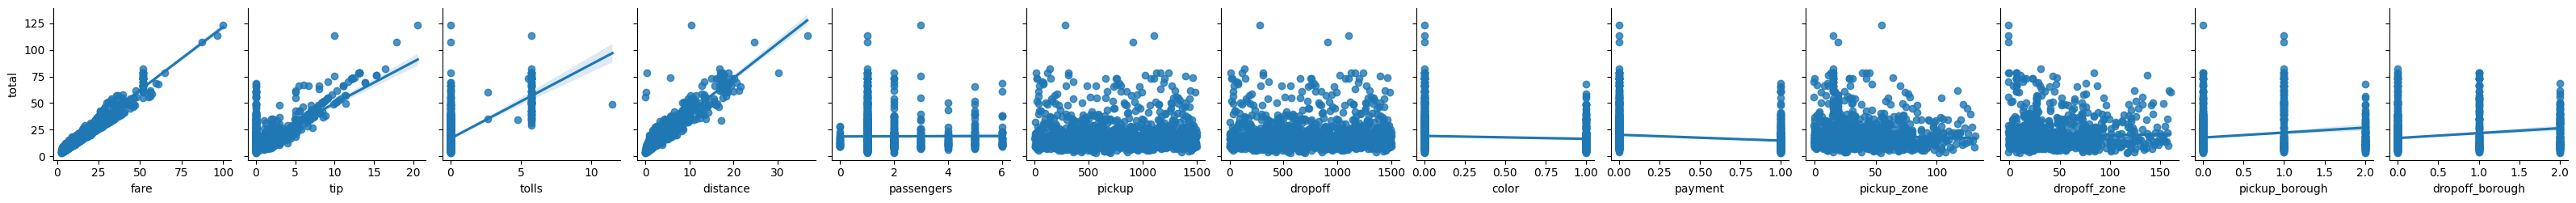

In [17]:
data_combined = X.copy()
data_combined["total"]=y
sns.pairplot(data_combined, y_vars=['total'], x_vars=X.columns, kind='reg')
plt.show()

## Training and Testing of data

In [18]:
#training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42) #random_state:controls shuffling applied to data before split
#25% of data is for testing and 75% is for training

## Standardizing the data

In [19]:
#standardising data with the help of z-score(mean=0; std dev = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[-0.64806294 -0.8130723  -0.23816886 ... -0.34031887 -0.42480107
  -0.43841463]
 [-0.17615135  0.17602497 -0.23816886 ...  0.94493207  3.16168737
   1.20677016]
 [-0.30485451  0.24943453 -0.23816886 ... -1.01215459 -0.42480107
  -0.43841463]
 ...
 [-0.51935978 -0.09829498 -0.23816886 ...  1.96729077  3.16168737
   2.85195495]
 [ 1.71149503 -0.8130723  -0.23816886 ...  0.94493207  3.16168737
   1.20677016]
 [ 0.46736446  0.9101206  -0.23816886 ...  1.52913704 -0.42480107
  -0.43841463]]


## Linear Regression

In [21]:
#regression
X_train = np.nan_to_num(X_train) #convert all NaN to numerical
print(X_train)
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

[[-0.64806294 -0.8130723  -0.23816886 ... -0.34031887 -0.42480107
  -0.43841463]
 [-0.17615135  0.17602497 -0.23816886 ...  0.94493207  3.16168737
   1.20677016]
 [-0.30485451  0.24943453 -0.23816886 ... -1.01215459 -0.42480107
  -0.43841463]
 ...
 [-0.51935978 -0.09829498 -0.23816886 ...  1.96729077  3.16168737
   2.85195495]
 [ 1.71149503 -0.8130723  -0.23816886 ...  0.94493207  3.16168737
   1.20677016]
 [ 0.46736446  0.9101206  -0.23816886 ...  1.52913704 -0.42480107
  -0.43841463]]


LinearRegression()

## Cross Validation

In [22]:
#cross-validation : done to avoid overfitting i.e failing to generalize a pattern
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv = 5) #cv:cross validation splitting strategy

In [23]:
val_score

array([-0.79645276, -0.72768491, -0.75110661, -0.76652438, -0.71037374])

In [24]:
X_test = np.nan_to_num(X_test) #convert all NaN to numerical
y_pred = regression.predict(X_test)

In [25]:
y_pred

array([ 10.70375192,  14.23255108,  12.87675177,  12.58381069,
        37.91256975,  41.31529191,  10.1058847 ,  19.33101057,
        14.19443092,  14.19995103,  10.58875531,  15.5196952 ,
        10.93089684,   7.9701998 ,  10.03932921,  18.09864268,
        12.85019813,  22.82359743,  18.55652654,  16.9243653 ,
        28.02560949,  23.01504255,  12.28720045,  13.75747915,
        36.36909825,  19.14784846,  12.33767201,  24.1106816 ,
        28.249249  ,  29.46442288,  11.44360224,  12.07817268,
        57.56916497,  11.56183738,  49.24616431,  17.29426282,
        18.27304376,  27.02734164,  13.8837788 ,  28.00984488,
        12.36078834,  12.61079684,  10.13283703,  14.95547624,
        24.14491297,  10.43314136,  13.24162563,  10.97516468,
        20.96384101,  11.41951995,  29.96879988,  11.53903726,
        35.28487994,  15.15301221,  19.8113581 ,  23.61242774,
         6.97891586,  10.31440536,  10.84549931,  23.33562168,
         8.72828126,  25.58355053,  14.48582909,  73.43

## Metrics

In [26]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7.248983602397535
0.6571259512257362
2.6923936566552698


In [27]:
score = r2_score(y_test,y_pred)
#to display adjusted r square
adj_score = 1-((1-score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print(score) #anything close to 1 is considered good
print(adj_score)

0.9516088010164003
0.9498661816624203


In [28]:
residuals = y_test - y_pred
print(residuals)

1116   -0.323752
1368    0.527449
422     2.173248
413    -0.233811
451    -2.112570
          ...   
155    -0.096178
1151   -0.032703
1141    0.091437
974     0.532541
1057   -0.409322
Name: total, Length: 375, dtype: float64


## Residual plot

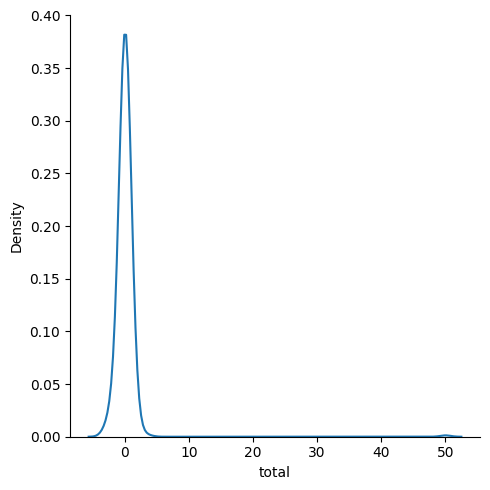

In [31]:
sns.displot(residuals,kind = 'kde') #kde = kernel density estimate
#as we can see below that there are more residuals near zero, which indicates good fitting graph